# Project4: Sales Prediction

### Import Packages

In [2]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

### [1] Loading Dataset

In [3]:
df=pd.read_csv('J:\Courses\Oasis Infobyte (Internship)\Projects\Pro 5 (Sales Prediction - Python)\Advertising.csv')
df.head()                                        # To get top 5 rows from table

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# we can remove Unnamed as it's sl no.

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


####  Checking null values

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Since, all column contains numerical data so no need to convert any data

### EDA

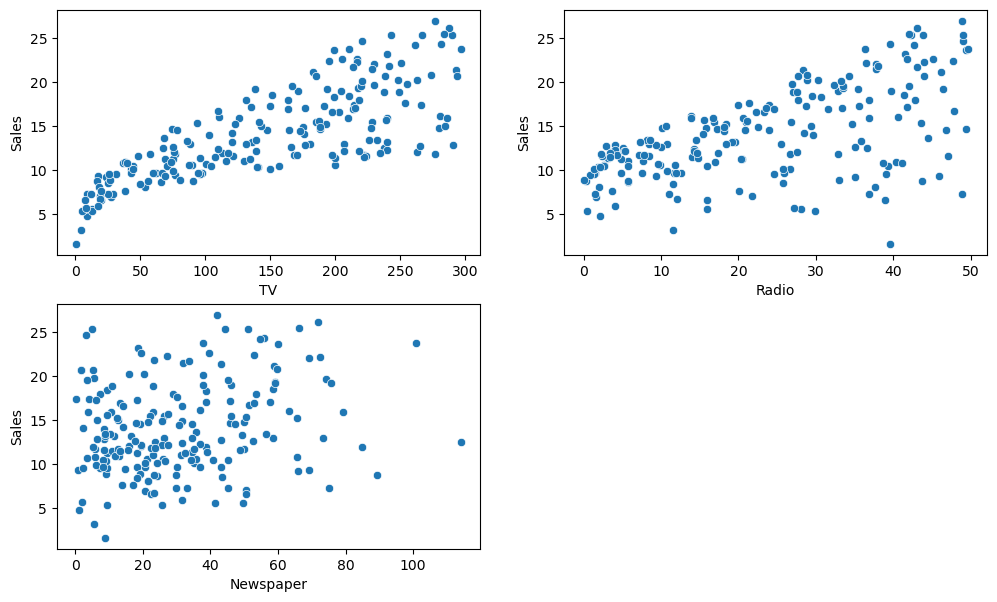

In [9]:
# Scatterplot (Num-Num)

plt.figure(figsize=(12,7))
plt.subplot(221)
sns.scatterplot(x = df["TV"], y = df["Sales"])

plt.subplot(222)
sns.scatterplot(x = df["Radio"], y = df["Sales"])

plt.subplot(223)
sns.scatterplot(x = df["Newspaper"], y = df["Sales"])

plt.show()

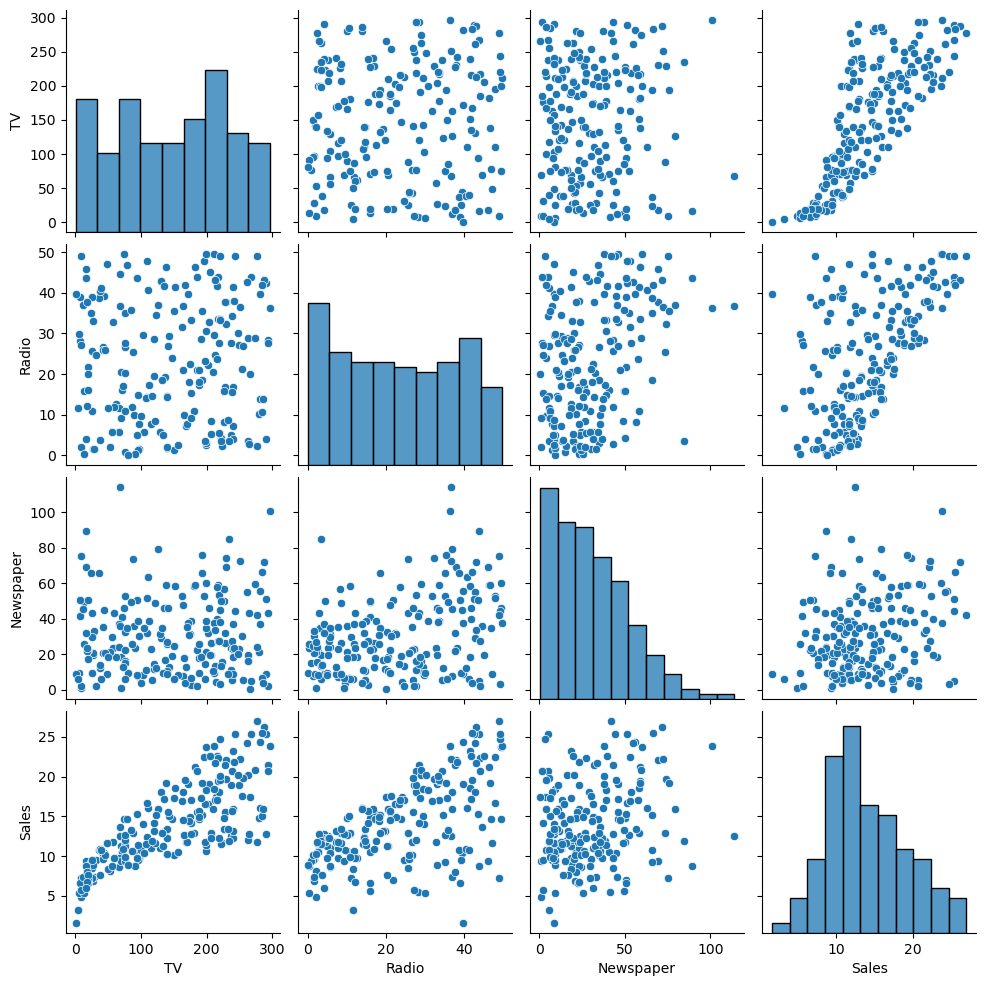

In [10]:
# Pairplot: takes only numerical columns from the table and do scatter plot
# with same col, it will do histogram and relation with other col will be scatter plot

sns.pairplot(df)                       # Visualize each numerical columns (including conversion from cat to num)

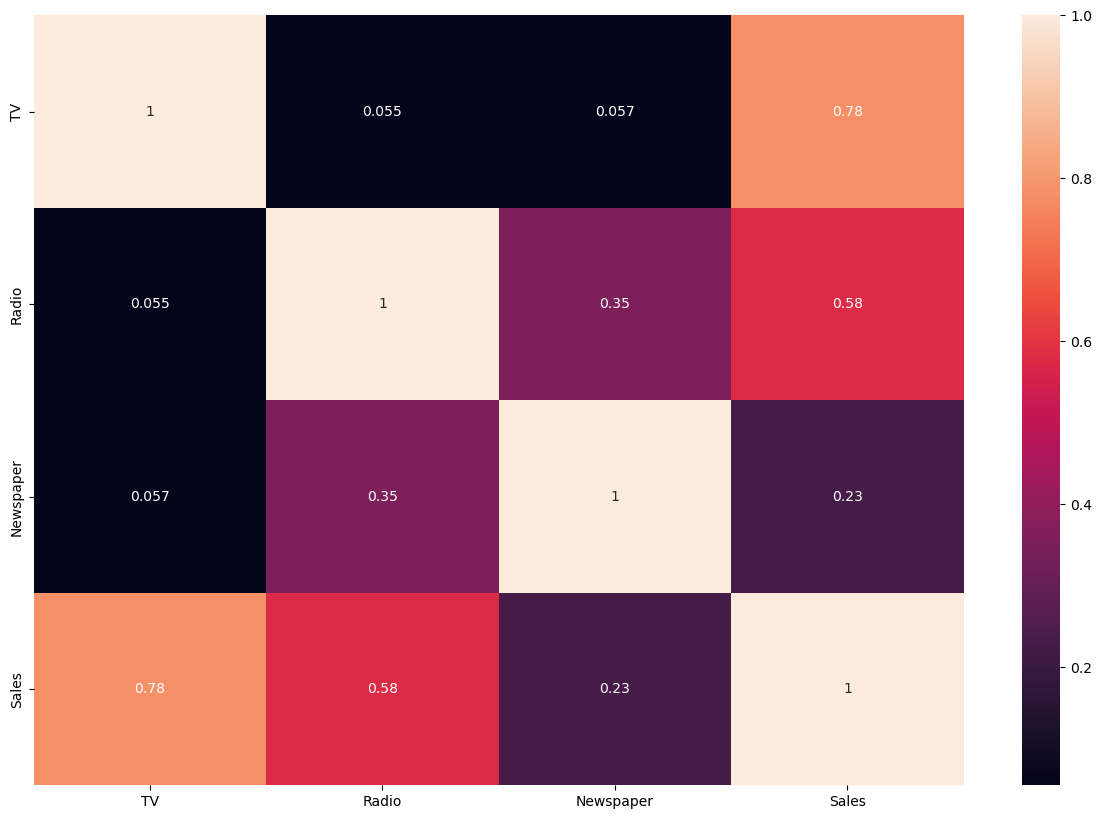

In [11]:
# Heatmap of all col (Corelation)
# Heatmap is used to find correlation between the variables

plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(method="pearson"), annot=True)                      # Pearson Correlation
plt.show()

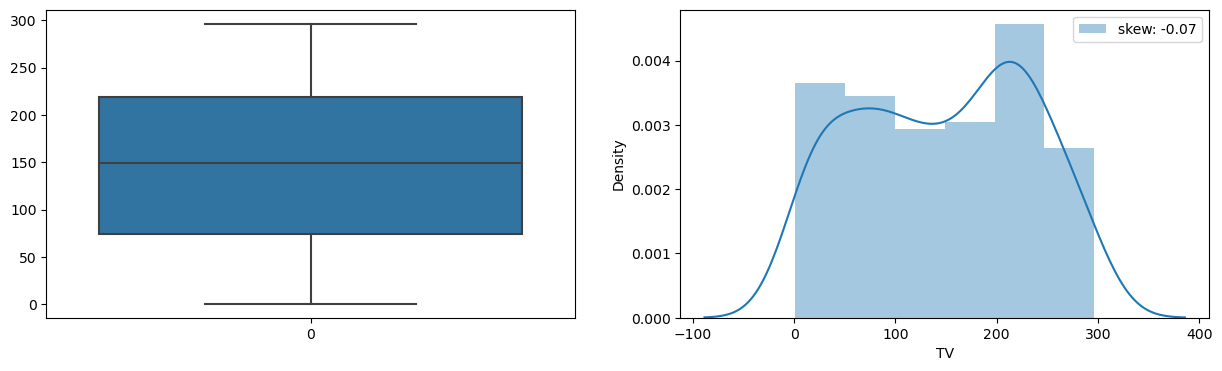

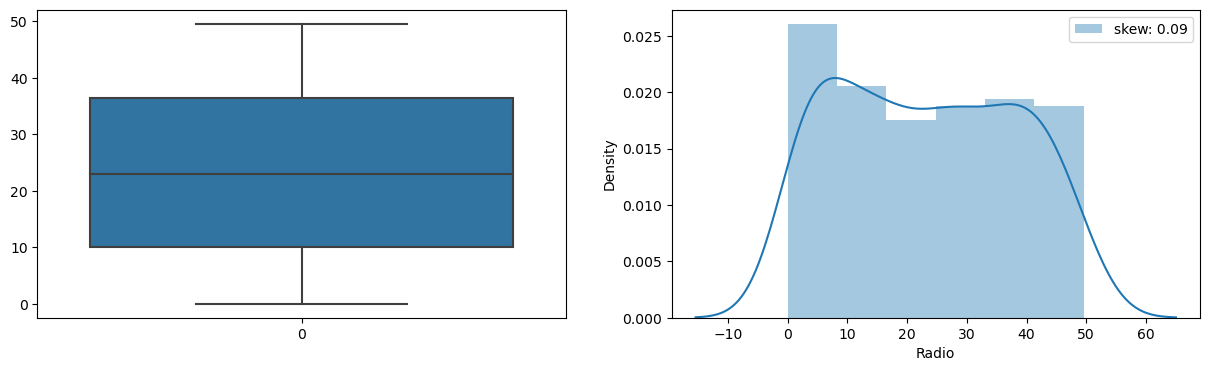

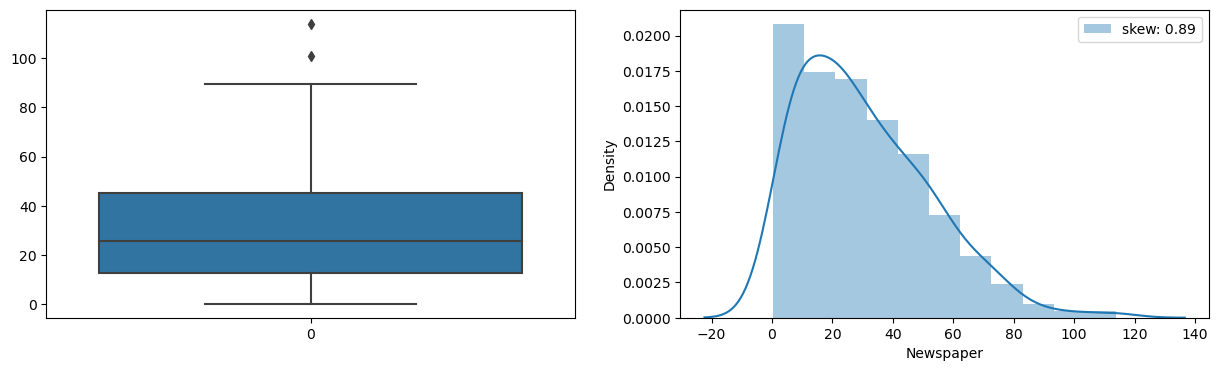

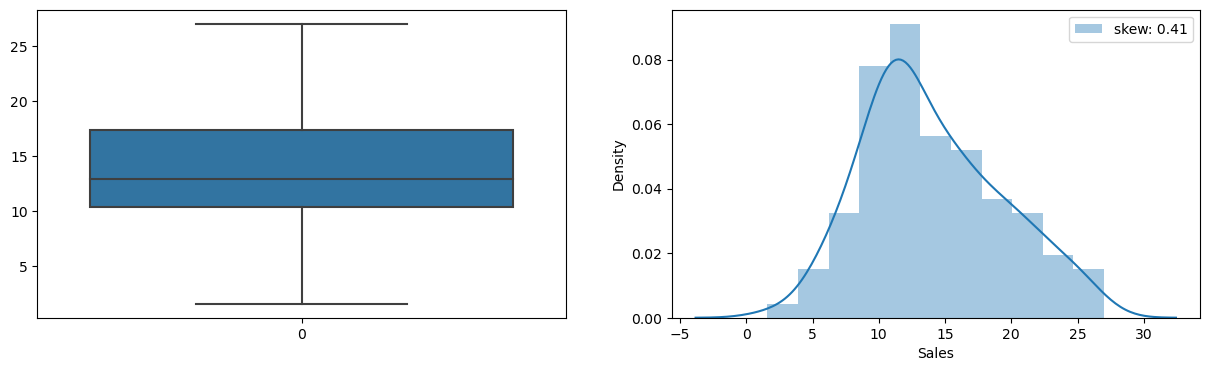

In [12]:
for col in df:
    plt.figure(figsize=(15,4))
    
    plt.subplot(121)
    sns.boxplot(df[col])                                                         # Boxplot: used to find outliers
    
    plt.subplot(122)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))       # Distplot
    plt.legend()
    
    plt.show()

### Split the data

In [13]:
# Give independent data to x & dependent data to y
x = df.drop(['Sales'],axis=1)                 # independent 
y = df['Sales']                               # dependent

In [14]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size indicates percentage of values for test i.e, 20% Data = Test & 80% Data = Train

In [15]:
len(X_train) , len(y_train)                   # 80% Random Data selected for train

(160, 160)

In [16]:
len(X_test) , len(y_test)                     # 20% Random Data selected for test

(40, 40)

### Give data to the model

In [17]:
# Since, dependent data i.e, Sales is continous, this falls under regression

In [18]:
# Now, giving training data to train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)                    # fit is mediator, gives train data to reg (algorithm: y=mx+c)

LinearRegression()

In [19]:
y_train_pred = reg.predict(X_train)
from sklearn.metrics import r2_score                              #r2_score = used to find accuracy of the model
# find accuracy of train_data
print(f'train accuracy : {r2_score(y_train,y_train_pred)}')

y_test_pred = reg.predict(X_test)
# find accuracy of test_data
print(f'test accuracy : {r2_score(y_test,y_test_pred)}')

train accuracy : 0.8957008271017817
test accuracy : 0.899438024100912


### Prediction with data

In [21]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [22]:
print('The Sales is',reg.predict([[204.1, 32.9, 46]]))

The Sales is [18.4598904]


In [20]:
res = pd.DataFrame({'Actual':y_test, 'prediction':y_test_pred})
res

,Actual,prediction
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


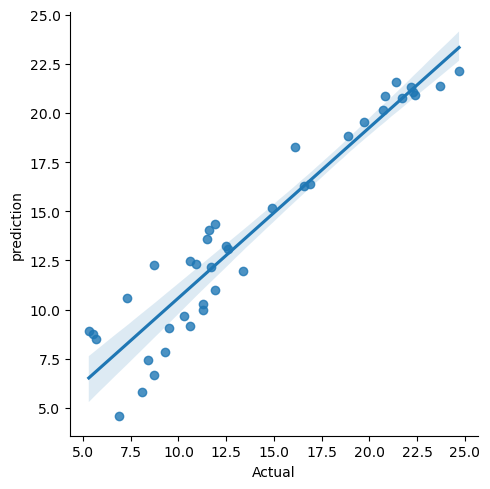

In [34]:
sns.lmplot(data=res, x = 'Actual', y='prediction')